# Embedded ML - Lab 1.1: Native implementation of Artificial Neural Netwroks

**Santiago Vargas Higuera**


---



In this lab you are asked to write the code for an Artificial Neural Network (ANN) without using ML libraries such as SciKit-learn, PyTorch or TensorFlow, but you are allowed to use standard libraries such as math, numpy and matplotlib if needed. You are given some code but you are expected to write some more and be able to explain and modify everything. This is a key foundational exercise for you to understand the efficiency aspects that will be dealt with throughout this course.

### Learning outcomes


* Explain the basic concepts of ANNs
* Implement simple ANNs in Python without using advanced libraries
* Analyze the computational resources demanded when training, running inference and scaling ANNs



### 1. Linear regression
Linear regression is perhaps the simplest form of ML and can be thought of as an ANN with a single neuron. Yet, it can make a linear approximation of an input-output pair of data arrays.

Below is an incomplete code for a Python class that implements a linear regressor. You should **complete the missing code** for the predict() and error() methods and then write a simple implementation of the class.

In [ ]:
import random

class LinRegressor:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def predict(self, x):
    self.myY = []

    # predict all the corresponding Y values from X, using a linear model
    for i in range(len(x)):
      self.myY.append(self.w * x[i] + self.b)

    return self.myY

  def error(self, y):
    total_square_error = 0

    # compute the total error using one of the metrics seen

    for i in range(len(y)):
      total_square_error += (y[i] - self.myY[i])**2
    total_square_error /= len(y)
    total_square_error = total_square_error**0.5
    return total_square_error

datasets = {"A": {
    "input": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
    "output": [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
    },
    "B": {
    "input": [-8, -5, -3.4, -2, 0, 1.9, 4, 6.2, 8, 11.5],
    "output": [-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
    }
}
ds = 'A'
input = datasets[ds]["input"]
output = datasets[ds]["output"]

# 1. Assign values to globals w and b
w = 2
b = -1

# 2. Instantiate the LinRegressor class
my_regressor = LinRegressor(w,b)

# 3. Perform a prediction using dataset A or B
preds = my_regressor.predict(input)

# 4. Measure the error
error = my_regressor.error(output)

print(f"Error de modelo = {error}")

Error de modelo = 0.0


Measure the error for three different sets of parameter values, for each dataset. **Plot the datasets against the predictions** and analyze the model results obtained.

*   Can the error of dataset A be zero?
*   Can the error of dataset B be zero?
*   A zero error means that the model represents the system perfectly?
*   Can you model any kind of system with this type of model?

- Yes, the error can be zero, because there are the adecuated w and b that can produce the correct outputs, and the data is lineal in this case.
- No, when plotting the data, it's noticed that the real output data has a non linear distribution, actually it seems to be a cuadrict distribution, but the model has a linear equation.
- Yes, but caution must be excercised, because possibly new values may behave in a non linear function.
- This type of model only can do the best to estimate linear data, otherwise the estimation of the values will be inexactly and the error will increase.

Error de modelo = 0.0


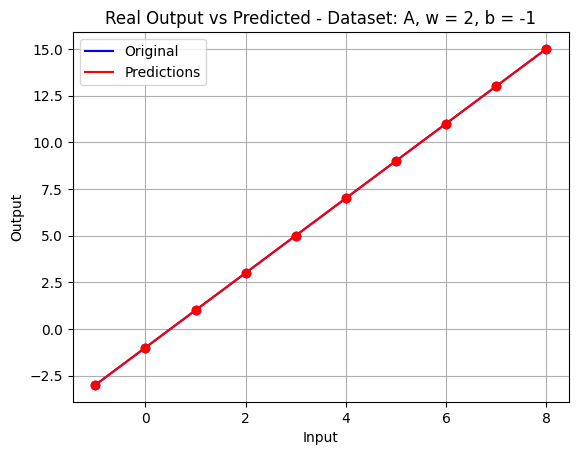

In [ ]:
# Plot datasets against prediction
import matplotlib.pyplot as plt
def calc_plot(ds, w, b):
  input = datasets[ds]["input"]
  output = datasets[ds]["output"]

  my_regressor = LinRegressor(w,b)
  preds = my_regressor.predict(input)
  error = my_regressor.error(output)
  print(f"Error de modelo = {error}")
  plt.plot(input, output, 'b', label = 'Original')
  plt.plot(input, output, 'bo')
  plt.plot(input, preds, 'r', label = 'Predictions')
  plt.plot(input, preds, 'ro')
  plt.ylabel("Output")
  plt.xlabel("Input")
  plt.legend()
  plt.title(f"Real Output vs Predicted - Dataset: {ds}, w = {w}, b = {b}")
  plt.grid()
  plt.show()
calc_plot(ds='A', w= 2, b= -1)

Error de modelo = 3.8078865529319543


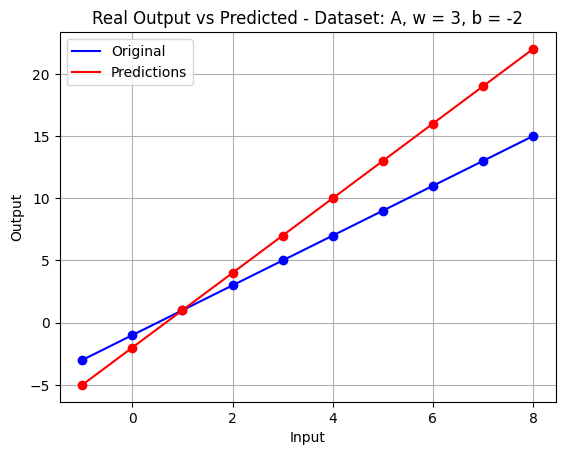

In [ ]:
calc_plot(ds='A', w= 3, b= -2)

Error de modelo = 1.0


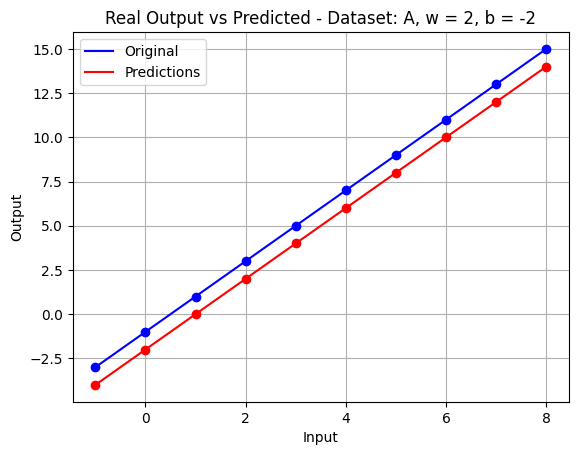

In [ ]:
calc_plot(ds='A', w= 2, b= -2)

Error de modelo = 14.581936428334886


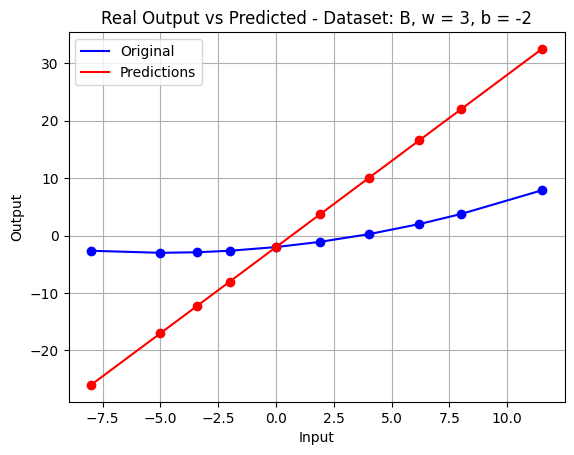

In [ ]:
calc_plot(ds='B', w= 3, b= -2)

Error de modelo = 1.882384126579907


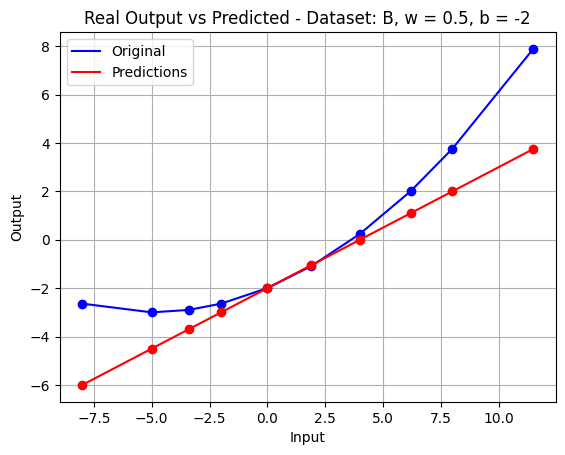

In [ ]:
calc_plot(ds='B', w= 0.5, b= -2)

In [ ]:
calc_plot(ds='A', w= 0.5, b= -2)

### 2. Artificial Neural Networks
Based on the principles of aproximating the mathematical relationship between two arrays of data, ANNs are scaled up algorithms that connect multiple linear regressors with activation functions in order to detect more complex relationships between data. The computation elements that make up an ANN are called Perceptrons or simply neurons, and they are topologically organized in layers.

Given is a Python code that partially implements a neural network with three layers: input, hidden and output. It defines methods for training and inference and uses the XOR function as a test case.

Study the code to get familiar with it and **complete the implementation of the forward()** method that takes in the network inputs to produce the outputs.
Verify the network works by running the code and observing the error going down and producing corrects results. Also play with the training parameters to see how learning improves or degrades.

Then mode to **implementing the my_dot() method to replace NumPy's dot()**, in order to make explicit the operations that are executed every time the method is called. Modify the forward method to use the new function and verify its correctness.

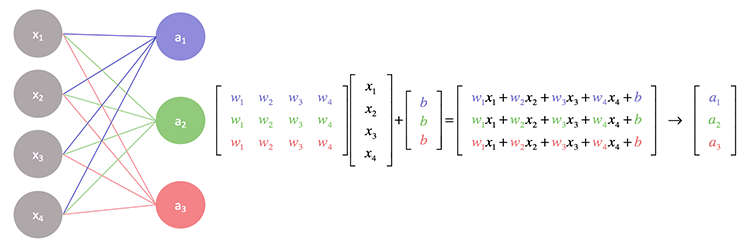

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        #The correct size should be hidden_size x input
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def my_dot(self, A, B):
        # dot product
        '''
          A => Input Data/Neurons. Must be an 1 x n OR j x n
          B => Weights. n (inputs) x m (number of outputs/Neurons)

          Neurons => j x m OR 1 x m
        '''

        cols = B.shape[1] #Output columns

        if len(A.shape) > 1:
          rows = A.shape[0] #Output rows
        else:
          rows = 1
          A = A.reshape(1,A.shape[0])
        Neurons = np.zeros((rows, cols))

        for c in range(cols): # By each column of B (input)
          for row in range(rows): # For each row of A (weights). All the weights for an single input
            a = 0 #Neuron
            for i in range(A.shape[1]): # Number of columns A = #Rows B
              a += A[row][i]*B[i][c] # Most important
            Neurons[row][c] = a


        #print(f"Neurons : {Neurons.T}")
        return Neurons

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        # Forward propagation through the network...
        # Step 1: dot product between the input and the weights
        # that connect with the hidden layer.
        self.hidden_output = self.my_dot(x, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_output)
        # Step 2: dot product between the activations (outputs) of the
        # hidden layer and the weights that connect with the output layer.
        self.output = self.my_dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.output = self.sigmoid(self.output)

        return self.output

    def backward(self, x, y, output, learning_rate):
        # Backpropagation and weight updates
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)

        self.hidden_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        error = 0
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 100 == 0:
                error = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss = {error:.4f}')


# Define XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=1000, learning_rate=0.5)

# Test the trained model
print("\nTest the trained model:")
for i in range(len(X)):
    output = nn.forward(X[i])
    print(f"Input: {X[i]}, Predicted Output: {output}, Actual Output: {y[i]}")

Epoch 0: Loss = 0.3753
Epoch 100: Loss = 0.2383
Epoch 200: Loss = 0.1993
Epoch 300: Loss = 0.1237
Epoch 400: Loss = 0.0555
Epoch 500: Loss = 0.0272
Epoch 600: Loss = 0.0162
Epoch 700: Loss = 0.0111
Epoch 800: Loss = 0.0083
Epoch 900: Loss = 0.0065

Test the trained model:
Input: [0 0], Predicted Output: [[0.04174031]], Actual Output: [0]
Input: [0 1], Predicted Output: [[0.92522744]], Actual Output: [1]
Input: [1 0], Predicted Output: [[0.92775493]], Actual Output: [1]
Input: [1 1], Predicted Output: [[0.09422809]], Actual Output: [0]


Let's define an abstraction in which basic computations are: additions, subtractions, multiplications, divisions or computing an activation fuction such as the sigmoid or its derivative. Then, analyze the code in detail to answer the following questions:

*   How many scalar basic computations are requiered for one forward pass, for one training iteration and for a complete training process?
*   Which are the newtwork parameters that determine the amount of computations required?

**Write a formula** that gives the amount of basic scalar computations depending on the network parameters.

---

The networks parameters that determine the amount of computations required are:

- $n$: The number of inputs. In this case during training process, $m = 8$, it represents all the input data.
- $m$: The number of neurons of the hidden layer. In this case, $n = 4$
- $h$: The number of ouputs. In this case it's 4 for all the output data.



**Scalars Basics computations**:
- **Forward pass:**
  It can be calculated as the computations required in the first dot product ($2(m \cdot n)$), plus the activation function and bias ($2m$), plus the second dot product ($2(h \cdot m )$), plus the output activation function and bias ($2h$). The formula can be determinated as:
  $$\text{#Comp} = 2\cdot[(m \cdot n + m ) + (h \cdot m + h) ]$$
- **One Training Iteration:**
  It will depend on the forward and backward pass. In the case of backward, the computations required involves:
  
  - The number of outputs to calculate error, and apply the output activation function derivative: $h + 2h$

  - The dot product to get the hidden error, and derivative error: $2(h \cdot m) + 2m$.

  - The update of weights and bias: $[2 \cdot (h\cdot h + h) + h] + [2 \cdot (m\cdot n + m) + m]$

The total for one Training iteration is:

$$\text{#Train} = [2\cdot[(m \cdot n + m ) + (h \cdot m + h) ] + m + h] + [h + 2h + (2(h \cdot m) + 2m) + [2 \cdot (h\cdot h + h) + h] + [2 \cdot (m\cdot n + m) + m]]$$


- **Complete Training Process**
It will depend on the number of iterations or epochs and one train pass:

$$\text{#Complete} =  \text{#Epochs} \cdot \text{#Train}$$


### 3. Scaling ANNs

In manys cases, but not all, increasing the number of layers and the number of neurons per layer leads to a higher accuracy of the model. This comes at the expense of more resources needed to run the network: memory and computation. And ultimately, it can lead to a higher application latency and energy consumption.

Here you should create a fully-connected neural network based on the previous model, this time to classify handwritten numbers using the **MNIST dataset**. Investigate how to obtain the dataset and how to prepare a proper partition between training and test.

The number of input neurons must be equal to the number of pixels on each image (depending on the chosen resolution). The number of output neurons must be 10, since there are 10 diffirent digits we want to classify. A new method must be included to select which of the digits was identified (by finding the most active output neuron). **Configure and test at least five versions of the model** by varying the amount of neurons in the hidden layer.

Make a table or a plot to report the following for each model:

*   Number of model parameters
*   Number of basic scalar computations for a forward pass (using the previously created formula)
*   Execution time for training and for a forward pass
*   Model's Top-1 accuracy.

#### Download Dataset

In [ ]:
import kagglehub

# Download latest version
PATH = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", PATH)

!cp -r {PATH} /content/

Path to dataset files: /kaggle/input/mnist-dataset


#### Load Dataset in Numpy arrays

In [ ]:
!pip install idx2numpy

In [ ]:
import idx2numpy
import os

contenido = os.listdir(PATH)

def aplanar_data(X):
  return np.array([i.flatten() for i in (np.array(X))])
def one_hot_encodding(y, dim = 10):
  vector = (np.zeros((1,dim))).flatten()
  vector[y] = 1
  return vector
def normalizar(X):
  return X/abs(max(X))

file_xtest ="t10k-images.idx3-ubyte"
file_ytest ="t10k-labels.idx1-ubyte"
file_xtrain="train-images.idx3-ubyte"
file_ytrain="train-labels.idx1-ubyte"

data_train_X = aplanar_data(idx2numpy.convert_from_file(os.path.join(PATH, file_xtrain)))
data_train_X = np.array([normalizar(x) for x in data_train_X])


data_train_y = (idx2numpy.convert_from_file(os.path.join(PATH, file_ytrain)))
data_train_y = np.array([one_hot_encodding(v) for v in data_train_y])

data_test_X = aplanar_data(idx2numpy.convert_from_file(os.path.join(PATH, file_xtest)))
data_test_X = np.array([normalizar(x) for x in data_test_X])


data_test_y = (idx2numpy.convert_from_file(os.path.join(PATH, file_ytest)))

data_test_y = np.array([one_hot_encodding(v) for v in data_test_y])

#### Train MNIST

In [ ]:
import numpy as np
import time

np.random.seed(42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        #The correct size should be hidden_size x input
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        # Forward propagation through the network...
        # Step 1: dot product between the input and the weights
        # that connect with the hidden layer.
        self.hidden_output = np.dot(x, self.weights_input_hidden) + self.bias_input_hidden

        self.hidden_output = self.sigmoid(self.hidden_output)
        # Step 2: dot product between the activations (outputs) of the
        # hidden layer and the weights that connect with the output layer.
        self.output = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output

        self.output = self.sigmoid(self.output)
        return self.output

    def backward(self, x, y, output, learning_rate):
        # Backpropagation and weight updates
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)

        self.hidden_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        error = 0
        self.track_loss = []
        for epoch in range(epochs):
          #for x, y in zip(X,Y):
          output = (self.forward(x))
          self.backward(x, y, output, learning_rate)
          if epoch % 10 == 0:
              error = np.mean(np.square(y - output))
              self.track_loss.append(float(error))
              if epoch % 100 == 0:
                print(f'Epoch {epoch}: Loss = {error:.4f}')


def test_model(x,y, my_nn):
  # Test the trained model
  print("\nTest the trained model:")
  tp = 0
  start_time = time.time()
  output = my_nn.forward(x[0])
  time_infer = time.time() - start_time
  if output.argmax() == y[0].argmax():
        tp += 1

  for i in range(1, x.shape[0]):
      output = my_nn.forward(x[i])

      if output.argmax() == y[i].argmax():
        tp += 1
  return tp/len(y), time_infer

def MyRed(neurons, epochs, learning_rate, size = 1000):
  nn_v1 = NeuralNetwork(input_size=784, hidden_size= neurons, output_size=10)

  start_time = time.time()
  nn_v1.train(data_train_X[:size], data_train_y[:size],
              epochs=epochs,
              learning_rate= learning_rate
              )
  time_train = time.time() - start_time

  acc, time_infer = test_model(data_test_X[:int(size*0.3)], data_test_y[:int(size*0.3)], nn_v1)
  #Number of scalar operations using the equation and parameters
  c = 2 * ((neurons * 784  + neurons) + (10 * neurons + 10))
  params = ((neurons * 784 + neurons) + (10 * neurons + 10))

  resultado = { "Params" : {"neurons" : neurons, "epochs" : epochs, "lr": learning_rate},
             "Ops" : c,
              "params": params,
             "train_t" : f"{time_train:.8f}",
              "infer_t" : f"{time_infer:.8f}",
              "top1-acc" : acc,
              "loss": nn_v1.track_loss}
  print(f"Accuracy for {neurons} Neurons: {(acc*100):2f}%")
  return resultado

resultados = {}

#### Varying the Number of Neurons

In [ ]:
# Variar numero de neuronas

neurons = 6
epochs = 1000
learning_rate = 0.01

resultados[f"{neurons}"] = MyRed(neurons, epochs, learning_rate)

Epoch 0: Loss = 0.3932
Epoch 100: Loss = 0.0713
Epoch 200: Loss = 0.0542
Epoch 300: Loss = 0.0433
Epoch 400: Loss = 0.0334
Epoch 500: Loss = 0.0271
Epoch 600: Loss = 0.0232
Epoch 700: Loss = 0.0201
Epoch 800: Loss = 0.0179
Epoch 900: Loss = 0.0160

Test the trained model:
Accuracy for 6 Neurons: 70.000000%


In [ ]:
neurons = 10
epochs = 1000
learning_rate = 0.01

resultados[f"{neurons}"] = MyRed(neurons, epochs, learning_rate)

Epoch 0: Loss = 0.3908
Epoch 100: Loss = 0.0531
Epoch 200: Loss = 0.0353
Epoch 300: Loss = 0.0261
Epoch 400: Loss = 0.0206
Epoch 500: Loss = 0.0176
Epoch 600: Loss = 0.0153
Epoch 700: Loss = 0.0137
Epoch 800: Loss = 0.0127
Epoch 900: Loss = 0.0120

Test the trained model:
Accuracy for 10 Neurons: 75.000000%


In [ ]:
neurons = 10
epochs = 1000
learning_rate = 0.01

resultados[f"{neurons}v2"] = MyRed(neurons, epochs, learning_rate)

Epoch 0: Loss = 0.3300
Epoch 100: Loss = 0.0565
Epoch 200: Loss = 0.0392
Epoch 300: Loss = 0.0292
Epoch 400: Loss = 0.0232
Epoch 500: Loss = 0.0186
Epoch 600: Loss = 0.0155
Epoch 700: Loss = 0.0131
Epoch 800: Loss = 0.0116
Epoch 900: Loss = 0.0104

Test the trained model:
Accuracy for 10 Neurons: 72.333333%


In [ ]:
neurons = 20
epochs = 1000
learning_rate = 0.01

resultados[f"{neurons}"] = MyRed(neurons, epochs, learning_rate)

Epoch 0: Loss = 0.4442
Epoch 100: Loss = 0.0417
Epoch 200: Loss = 0.0250
Epoch 300: Loss = 0.0188
Epoch 400: Loss = 0.0151
Epoch 500: Loss = 0.0126
Epoch 600: Loss = 0.0107
Epoch 700: Loss = 0.0095
Epoch 800: Loss = 0.0086
Epoch 900: Loss = 0.0080

Test the trained model:
Accuracy for 20 Neurons: 80.333333%


In [ ]:
neurons = 32
epochs = 1000
learning_rate = 0.01

resultados[f"{neurons}"] = MyRed(neurons, epochs, learning_rate)

Epoch 0: Loss = 0.3805
Epoch 100: Loss = 0.0635
Epoch 200: Loss = 0.0437
Epoch 300: Loss = 0.0364
Epoch 400: Loss = 0.0342
Epoch 500: Loss = 0.0308
Epoch 600: Loss = 0.0263
Epoch 700: Loss = 0.0203
Epoch 800: Loss = 0.0175
Epoch 900: Loss = 0.0110

Test the trained model:
Accuracy for 32 Neurons: 78.000000%


In [ ]:
neurons = 64
epochs = 1000
learning_rate = 0.01

resultados[f"{neurons}"] = MyRed(neurons, epochs, learning_rate)

Epoch 0: Loss = 0.4910
Epoch 100: Loss = 0.0760
Epoch 200: Loss = 0.0379
Epoch 300: Loss = 0.0252
Epoch 400: Loss = 0.0192
Epoch 500: Loss = 0.0168
Epoch 600: Loss = 0.0157
Epoch 700: Loss = 0.0150
Epoch 800: Loss = 0.0146
Epoch 900: Loss = 0.0142

Test the trained model:
Accuracy for 64 Neurons: 76.000000%


In [ ]:
neurons = 128
epochs = 1000
learning_rate = 0.5

resultados[f"{neurons}"] = MyRed(neurons, epochs, learning_rate)

Epoch 0: Loss = 0.4350


<ipython-input-109-1db7247eac6f>:20: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 100: Loss = 0.1000
Epoch 200: Loss = 0.1000
Epoch 300: Loss = 0.1000
Epoch 400: Loss = 0.1000
Epoch 500: Loss = 0.1000
Epoch 600: Loss = 0.1000
Epoch 700: Loss = 0.1000
Epoch 800: Loss = 0.1000
Epoch 900: Loss = 0.1000

Test the trained model:
Accuracy for 128 Neurons: 8.000000%


#### MNIST Results

In [ ]:
import pandas as pd
#The total data is 3000 images for training.
#Test data = 3000*0.3 = 900
def create_table_from_dict(data_dict):
    table_data = []
    for neurons, model_data in data_dict.items():
        row_data = {
            "Neurons": neurons,
            "Epochs": model_data["Params"]["epochs"],
            "Learning Rate": model_data["Params"]["lr"],
            "Parameters": model_data["params"],
            "Operations": model_data["Ops"],
            "Train Time (s)": model_data["train_t"],
            "Inference Time (s)": model_data["infer_t"],
            "Top-1 Accuracy": model_data["top1-acc"],
        }
        table_data.append(row_data)
    df = pd.DataFrame(table_data)

    return df

In [ ]:
table = create_table_from_dict(resultados)
display(table)

,Neurons,Epochs,Learning Rate,Parameters,Operations,Train Time (s),Inference Time (s),Top-1 Accuracy
0,6,1000,0.01,4780,9560,3.90561223,0.00006628,0.700000
1,10,1000,0.01,7960,15920,6.74726915,0.00040984,0.750000
2,10v2,1000,0.01,7960,15920,8.57555103,0.00006843,0.723333
3,20,1000,0.01,15910,31820,18.00067353,0.00011206,0.803333
4,32,1000,0.01,25450,50900,8.19358468,0.00035906,0.780000
5,64,1000,0.01,50890,101780,25.15834165,0.00015163,0.760000
6,128,1000,0.50,101770,203540,34.43550348,0.00019026,0.080000


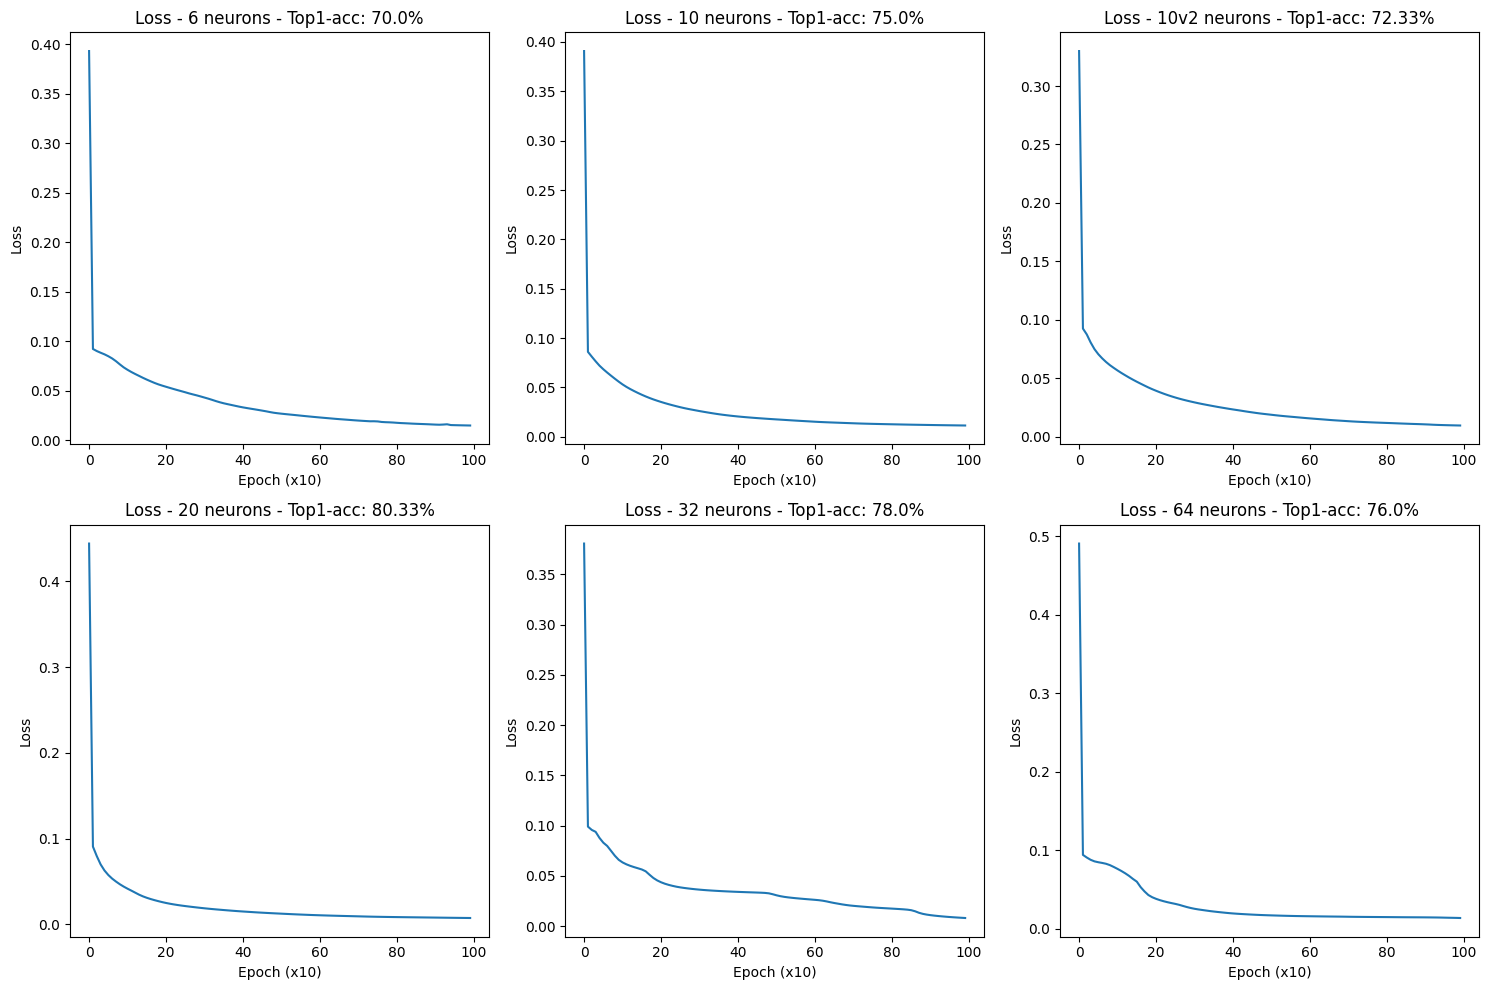

In [ ]:
import matplotlib.pyplot as plt
def plot_resultados(resultados):
  fig, axes = plt.subplots(2, 3, figsize=(15, 10))

  for i, (model_name, data) in enumerate(resultados.items()):
      row = i // 3  #Used to plot 3 cols
      col = i % 3
      if row < axes.shape[0] and col < axes.shape[1]:
          ax = axes[row, col]
          ax.plot(data["loss"])
          ax.set_title(f"Loss - {model_name} neurons - Top1-acc: {round(data['top1-acc']*100,2)}%")
          ax.set_xlabel(f"Epoch (x10)")
          ax.set_ylabel("Loss")
  plt.tight_layout()
  plt.show()
plot_resultados(resultados)

In [ ]:
neurons = 8
epochs = 500
learning_rate = 0.01
resultados2 = {}
resultados2[f"{neurons}"] = MyRed(neurons, epochs, learning_rate, size = 5000)

Epoch 0: Loss = 0.2029
Epoch 100: Loss = 0.0705
Epoch 200: Loss = 0.0567
Epoch 300: Loss = 0.0506
Epoch 400: Loss = 0.0460

Test the trained model:
Accuracy for 8 Neurons: 58.133333%


In [ ]:
neurons = 8
epochs = 500
learning_rate = 0.001

resultados2[f"{neurons}v2"] = MyRed(neurons, epochs, learning_rate, size = 5000)

Epoch 0: Loss = 0.3671
Epoch 100: Loss = 0.0760
Epoch 200: Loss = 0.0663
Epoch 300: Loss = 0.0570
Epoch 400: Loss = 0.0486

Test the trained model:
Accuracy for 8 Neurons: 64.266667%


In [ ]:
neurons = 8
epochs = 2000
learning_rate = 0.005

resultados[f"{neurons}v3"] = MyRed(neurons, epochs, learning_rate, size = 2000)

Epoch 0: Loss = 0.2634
Epoch 100: Loss = 0.0547
Epoch 200: Loss = 0.0379
Epoch 300: Loss = 0.0284
Epoch 400: Loss = 0.0230
Epoch 500: Loss = 0.0199
Epoch 600: Loss = 0.0179
Epoch 700: Loss = 0.0163
Epoch 800: Loss = 0.0151
Epoch 900: Loss = 0.0142
Epoch 1000: Loss = 0.0134
Epoch 1100: Loss = 0.0127
Epoch 1200: Loss = 0.0122
Epoch 1300: Loss = 0.0117
Epoch 1400: Loss = 0.0113
Epoch 1500: Loss = 0.0110
Epoch 1600: Loss = 0.0106
Epoch 1700: Loss = 0.0104
Epoch 1800: Loss = 0.0102
Epoch 1900: Loss = 0.0100

Test the trained model:
Accuracy for 8 Neurons: 76.333333%


In [ ]:
neurons = 8
epochs = 3000
learning_rate = 0.0002

resultados2[f"{neurons}v4"] = MyRed(neurons, epochs, learning_rate, size = 2000)

Epoch 0: Loss = 0.2374
Epoch 100: Loss = 0.0934
Epoch 200: Loss = 0.0907
Epoch 300: Loss = 0.0889
Epoch 400: Loss = 0.0873
Epoch 500: Loss = 0.0856
Epoch 600: Loss = 0.0838
Epoch 700: Loss = 0.0819
Epoch 800: Loss = 0.0800
Epoch 900: Loss = 0.0781
Epoch 1000: Loss = 0.0763
Epoch 1100: Loss = 0.0745
Epoch 1200: Loss = 0.0726
Epoch 1300: Loss = 0.0708
Epoch 1400: Loss = 0.0691
Epoch 1500: Loss = 0.0675
Epoch 1600: Loss = 0.0660
Epoch 1700: Loss = 0.0646
Epoch 1800: Loss = 0.0633
Epoch 1900: Loss = 0.0621
Epoch 2000: Loss = 0.0610
Epoch 2100: Loss = 0.0599
Epoch 2200: Loss = 0.0589
Epoch 2300: Loss = 0.0579
Epoch 2400: Loss = 0.0569
Epoch 2500: Loss = 0.0560
Epoch 2600: Loss = 0.0552
Epoch 2700: Loss = 0.0544
Epoch 2800: Loss = 0.0535
Epoch 2900: Loss = 0.0528

Test the trained model:
Accuracy for 8 Neurons: 55.333333%


In [ ]:
neurons = 14
epochs = 3000
learning_rate = 0.005

resultados2[f"{neurons}"] = MyRed(neurons, epochs, learning_rate, size = 2000)

Epoch 0: Loss = 0.3592
Epoch 100: Loss = 0.0561
Epoch 200: Loss = 0.0347
Epoch 300: Loss = 0.0252
Epoch 400: Loss = 0.0200
Epoch 500: Loss = 0.0168
Epoch 600: Loss = 0.0148
Epoch 700: Loss = 0.0135
Epoch 800: Loss = 0.0124
Epoch 900: Loss = 0.0113
Epoch 1000: Loss = 0.0105
Epoch 1100: Loss = 0.0098
Epoch 1200: Loss = 0.0091
Epoch 1300: Loss = 0.0085
Epoch 1400: Loss = 0.0081
Epoch 1500: Loss = 0.0077
Epoch 1600: Loss = 0.0074
Epoch 1700: Loss = 0.0071
Epoch 1800: Loss = 0.0069
Epoch 1900: Loss = 0.0067
Epoch 2000: Loss = 0.0065
Epoch 2100: Loss = 0.0063
Epoch 2200: Loss = 0.0061
Epoch 2300: Loss = 0.0060
Epoch 2400: Loss = 0.0058
Epoch 2500: Loss = 0.0057
Epoch 2600: Loss = 0.0056
Epoch 2700: Loss = 0.0055
Epoch 2800: Loss = 0.0054
Epoch 2900: Loss = 0.0053

Test the trained model:
Accuracy for 14 Neurons: 80.000000%


In [ ]:
neurons = 14
epochs = 3000
learning_rate = 0.01

resultados2[f"{neurons}v2"] = MyRed(neurons, epochs, learning_rate, size = 2000)

Epoch 0: Loss = 0.2765
Epoch 100: Loss = 0.0510
Epoch 200: Loss = 0.0358
Epoch 300: Loss = 0.0306
Epoch 400: Loss = 0.0281
Epoch 500: Loss = 0.0198
Epoch 600: Loss = 0.0171
Epoch 700: Loss = 0.0124
Epoch 800: Loss = 0.0100
Epoch 900: Loss = 0.0082
Epoch 1000: Loss = 0.0071
Epoch 1100: Loss = 0.0066
Epoch 1200: Loss = 0.0061
Epoch 1300: Loss = 0.0058
Epoch 1400: Loss = 0.0056
Epoch 1500: Loss = 0.0053
Epoch 1600: Loss = 0.0051
Epoch 1700: Loss = 0.0049
Epoch 1800: Loss = 0.0047
Epoch 1900: Loss = 0.0045
Epoch 2000: Loss = 0.0044
Epoch 2100: Loss = 0.0043
Epoch 2200: Loss = 0.0042
Epoch 2300: Loss = 0.0042
Epoch 2400: Loss = 0.0040
Epoch 2500: Loss = 0.0039
Epoch 2600: Loss = 0.0039
Epoch 2700: Loss = 0.0038
Epoch 2800: Loss = 0.0037
Epoch 2900: Loss = 0.0036

Test the trained model:
Accuracy for 14 Neurons: 81.833333%


In [ ]:
table = create_table_from_dict(resultados2)
display(table)

,Neurons,Epochs,Learning Rate,Parameters,Operations,Train Time (s),Inference Time (s),Top-1 Accuracy
0,8,500,0.0100,6370,12740,13.59491920,0.00651908,0.581333
1,8v2,500,0.0010,6370,12740,13.68923545,0.00008059,0.642667
2,8v4,3000,0.0002,6370,12740,32.24878073,0.00008702,0.553333
3,14,3000,0.0050,11140,22280,40.08108473,0.00011253,0.800000
4,14v2,3000,0.0100,11140,22280,40.17199945,0.00008082,0.818333


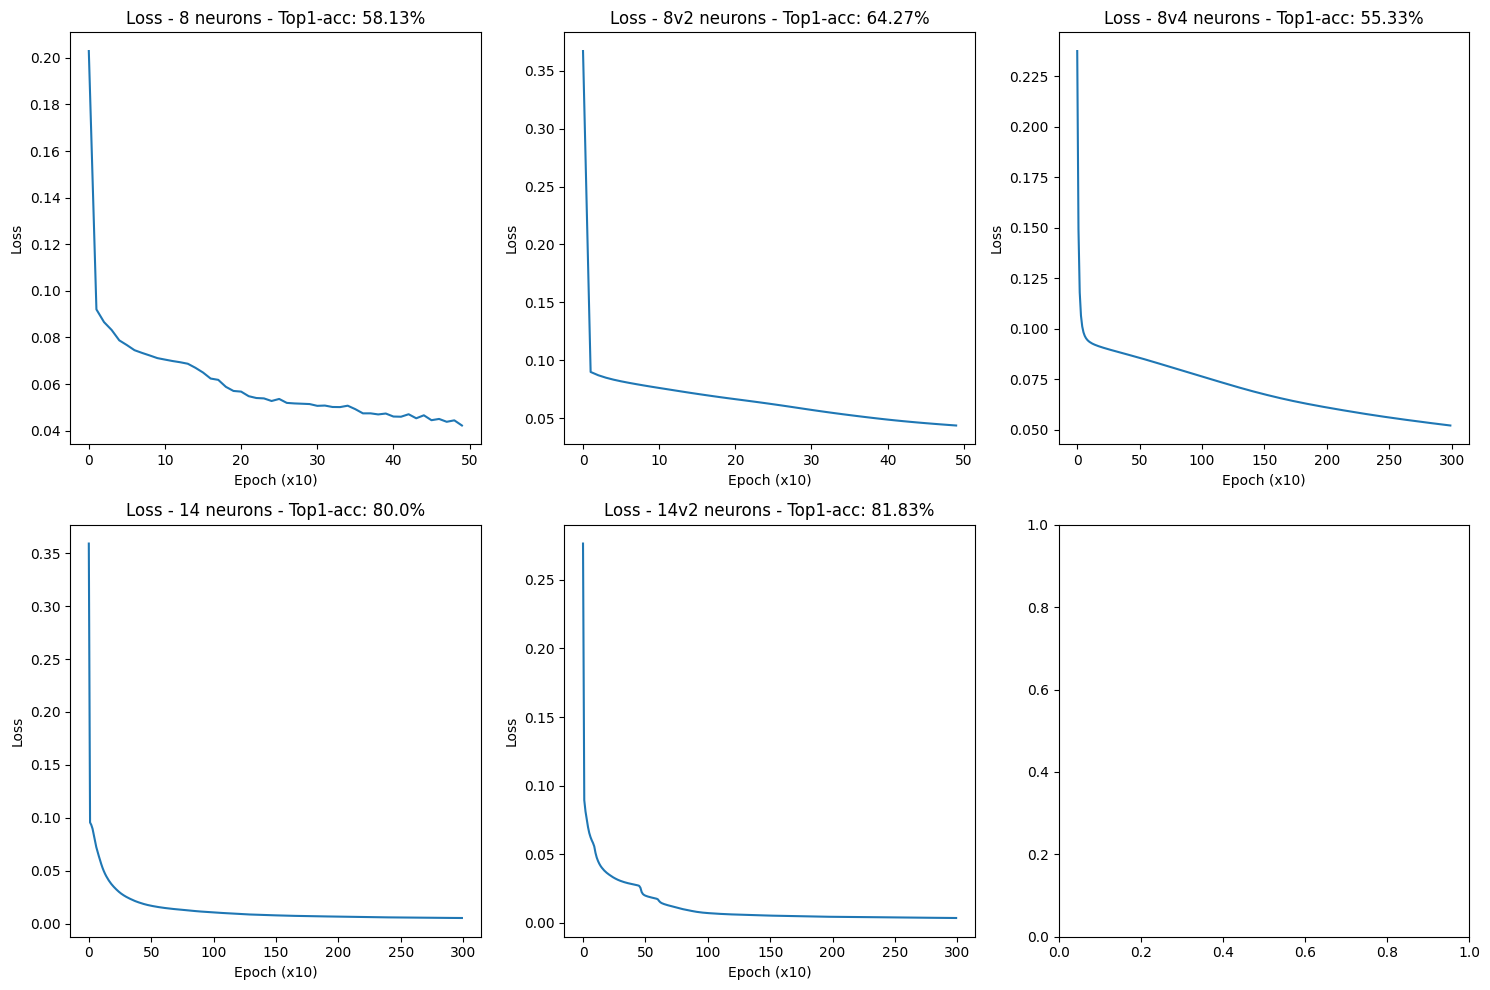

In [ ]:
plot_resultados(resultados2)

* According to the results, some parameters were varied, specifically the numbers of neurons, but increasing the number of neurons doesn't guarantee a better model. This will increase the complexity of the ANN, and will imply more scalars computations, specifically by increasing the number of neurons.
* The error calculated in most of the models begins with a high value, after this, during the first iterations, the error decreases in a few epochs. However, in some configurations, this loss function stop improving, i.e, the values stop decreasing and a horizontal line can be observed and the error can't reach a lower value.
* In the first two models, using fewers neurons, it can be observed an smoother loss function, along the number of epochs the error keeps decreasing, it means that the model is finding better weights, and the loss is closer to 0.0 compared to Models with high number of neurons, where the error might be around 0.05.